In [398]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [399]:
df = pd.read_csv('/home/devjith/Luminar/Machine Learning/files/loan_train.csv')

In [400]:
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


In [401]:
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Term                  float64
Credit_History        float64
Area                   object
Status                 object
dtype: object

In [402]:
df.isna().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

In [403]:
gender_count = df['Gender'].value_counts()
gender_count

Gender
Male      489
Female    112
Name: count, dtype: int64

In [404]:
df['Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

VISUALS
----------

<BarContainer object of 2 artists>

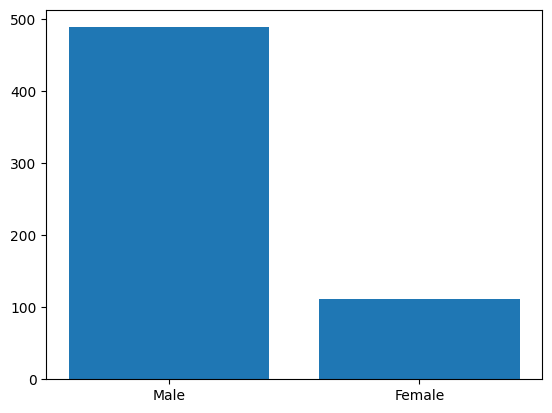

In [405]:
plt.bar(gender_count.index,gender_count.values)


<BarContainer object of 2 artists>

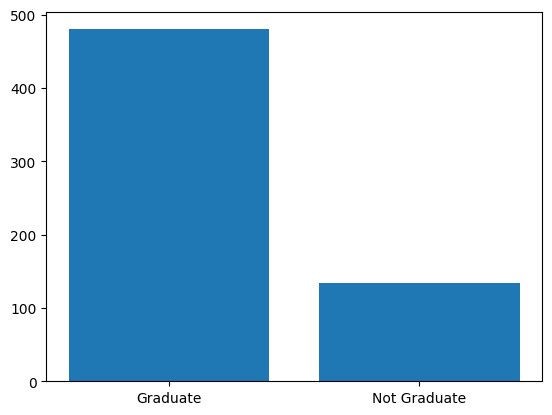

In [406]:
educate_count = df['Education'].value_counts()
plt.bar(educate_count.index,educate_count.values)

In [407]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

MISSING VALUE FILLING
--------

In [408]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Term'] = df['Term'].fillna(df['Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

df.isna().sum()

Gender                13
Married                0
Dependents             0
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                   0
Credit_History         0
Area                   0
Status                 0
dtype: int64

In [409]:
df = df.drop(columns=['Gender'])
df

,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y


Label Encoding
-----

In [410]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


for i in df.columns:
    if df[i].dtype==object:
        df[i] = le.fit_transform(df[i])
    

In [411]:
df

,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
610,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
611,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1
612,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,1


In [412]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values


In [413]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [414]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(x_train)

x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [415]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()

model.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [416]:
y_pred = model.predict(x_test)

In [417]:
from sklearn.metrics import confusion_matrix,accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_pred,y_test)
acc = accuracy_score(y_pred,y_test)
cm,acc

(array([[ 24,   2],
        [ 37, 122]]),
 0.7891891891891892)

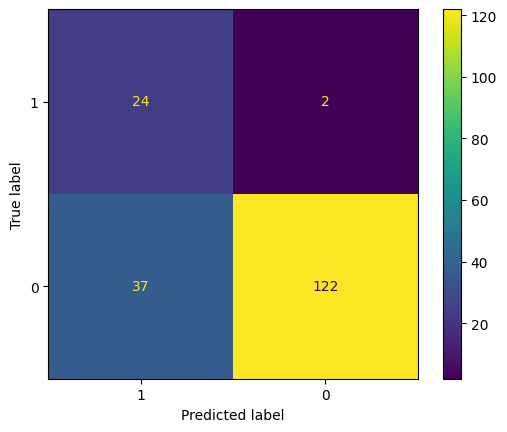

In [418]:
lab = ['1','0']
cmd = ConfusionMatrixDisplay(cm,display_labels=lab)
cmd.plot()